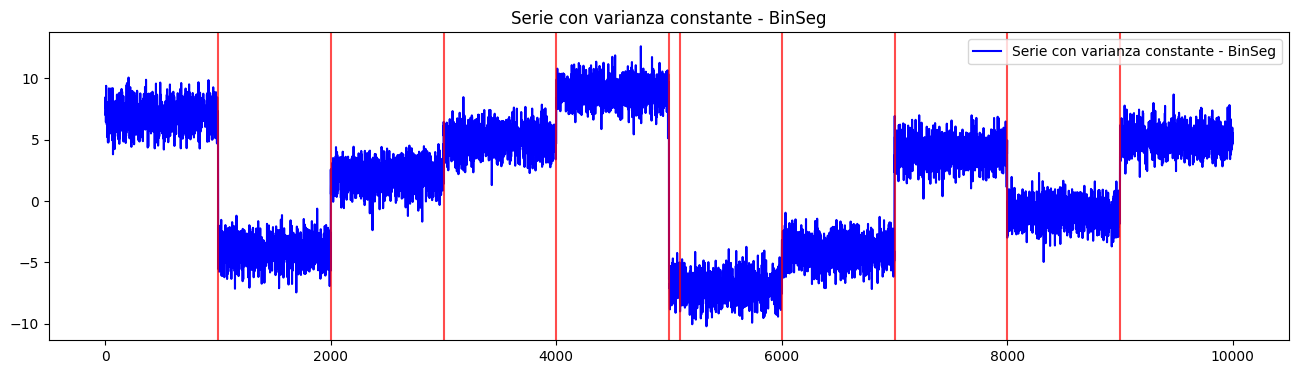

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Función para generar una serie con VARIANZA CONSTANTE
def serieVarianzaConstante(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(np.random.randint(-10, 10), 1, tamano_segmento)  
        for _ in range(num_segmentos)  
    ])
    return pd.Series(serie)  

# Función para graficar la serie con los cambios detectados
def plot_change_points(serie, change_points, title):
    plt.figure(figsize=(16, 4))
    plt.plot(serie, label=title, color='blue')

    for x in change_points:
        plt.axvline(x, lw=1.5, color='red', alpha=0.7)  

    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Generar la serie
serie1 = serieVarianzaConstante(10, 1000)    
serie1_np = serie1.values.reshape(-1, 1)  

# BinSeg
def find_change_points_binseg(series, model="l2", n_bkps=10):
    algo = rpt.Binseg(model=model).fit(series)
    return algo.predict(n_bkps=n_bkps)

change_points = find_change_points_binseg(serie1_np, model="l2", n_bkps=10)

# Graficar serie con detección de cambios
plot_change_points(serie1, change_points[:-1], "Serie con varianza constante - BinSeg")
plt.show()

### 📊 Observaciones sobre BinSeg

El algoritmo **BinSeg** fue capaz de detectar todos los puntos de cambio en la serie
temporal con **varianza constante**, esto confirma la efectividad del método. 
